In [1]:
library(pogit)

In [2]:
X <- as.matrix(data.table::fread("/data/GIT/cnv-gene-mapping/data/deletion_simu/block_79_137/deletion.genes.block30.for_simu.sample.genes.block_79_137.gz", header = F))

In [3]:
y <- as.matrix(data.table::fread("/data/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.for_simu.sample.y"))

In [4]:
length(y)

[1] 13412

In [5]:
# beta <- as.matrix(data.table::fread("/data/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.for_simu.sample.beta"))

In [13]:
# mean(beta); sd(beta); sum(beta == 0); sum(beta == 0)/length(beta)

In [5]:
X <- cbind(rep(1, nrow(X)), X)

In [6]:
y <- as.numeric(y[,1])

In [7]:
length(y)

[1] 13412

In [8]:
N <- rep(1, length(y))

In [11]:
# prior <- readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.binomial.whole.genome.prior.varbvs.rds")
# prior <- readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.binomial.whole.genome.prior.varbvs.nologodds.rds")

In [14]:
prior <- readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/deletion.genes.block30.binomial.whole.genome.prior.varbvs.nologodds.updateb0.rds")

In [15]:
mu0 = sum(prior$b0 * prior$w)

In [16]:
mu0

[1] 0.7770721

In [17]:
var = sum(prior$sa * prior$w)

In [18]:
var

[1] 0.7117456

In [19]:
pi0 = sum((10^(prior$logodds) / (1 + 10^(prior$logodds))) * prior$w)

In [20]:
pi0

[1] 0.0437755

In [20]:
# b = prior$beta[which(prior$beta != 0)]
# mean(b); var(b); sum(prior$beta == 0); sum(prior$beta == 0)/length(prior$beta)

In [75]:
res <- logitBvs(y, N, X, prior = list(slab = "Normal", aj0 = rep(mu0, ncol(X)-1), V = var, w = c(wa0 = 1, wb0 = 1), pi = c(pa0 = 1.412, pb0 = 10)), 
                mcmc = list(M = 24000, burnin = 6000, msave = TRUE), BVS = FALSE)


MCMC for the binomial logit model:

it = 1 /--- duration of MCMC so far: 28.9 sec.,  expected time to end: Inf  min. 
it = 2 /--- duration of MCMC so far: 29.14 sec.,  expected time to end: 14570.01  min. 
it = 3 /--- duration of MCMC so far: 29.45 sec.,  expected time to end: 7360.76  min. 
it = 4 /--- duration of MCMC so far: 29.58 sec.,  expected time to end: 4929.84  min. 
it = 5 /--- duration of MCMC so far: 29.74 sec.,  expected time to end: 3717.13  min. 
it = 10 /--- duration of MCMC so far: 30.34 sec.,  expected time to end: 1684.94  min. 
it = 20 /--- duration of MCMC so far: 31.66 sec.,  expected time to end: 832.63  min. 
it = 50 /--- duration of MCMC so far: 35.58 sec.,  expected time to end: 362.45  min. 
it = 100 /--- duration of MCMC so far: 42.17 sec.,  expected time to end: 212.26  min. 
it = 200 /--- duration of MCMC so far: 54.91 sec.,  expected time to end: 137.06  min. 
it = 500 /--- duration of MCMC so far: 91.6 sec.,  expected time to end: 90.25  min. 
it = 100

In [76]:
saveRDS(res, "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/logitBvs.var.selection.res.rds")

In [1]:
res <- readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/logitBvs.var.selection.res.rds")

In [30]:
# res1 <- logitBvs(y, N, X, prior = list(slab = "Normal", aj0 = mu, V = 1.725, w = c(wa0 = 1, wb0 = 1), pi = c(pa0 = 0.02, pb0 = 20)), 
#                  mcmc = list(M = 1000, burnin = 200, msave = TRUE), BVS = FALSE)

In [27]:
# saveRDS(res1, "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/logitBvs.novar.selection.nointercept.res.rds")

In [2]:
names(res)

[1] "samplesL"    "data"        "model.logit" "mcmc"        "prior.logit"
 [6] "dur"         "BVS"         "start"       "family"      "call"

In [3]:
names(res$samplesL)

[1] "alpha"       "pdeltaAlpha" "psiAlpha"    "thetaAlpha"  "pgammaAlpha"
[6] "ai"

In [4]:
tail(res$samplesL$alpha)

,alpha.0,alpha.1,alpha.2,alpha.3,alpha.4,alpha.5,alpha.6,alpha.7,alpha.8,alpha.9,⋯,alpha.50,alpha.51,alpha.52,alpha.53,alpha.54,alpha.55,alpha.56,alpha.57,alpha.58,alpha.59
"[29995,]",-0.007653857,-0.5193818,-0.520366601,-0.1474175,-0.76011955,0.7388037,1.47619864,-0.8617838,-0.50778035,-0.2405105,⋯,-0.41974952,-0.3631451,-0.72137598,0.25719187,0.39627697,0.20411898,-0.3374192,-0.15102723,-1.0826467,-0.7347509
"[29996,]",0.026830350,-1.5508240,-0.389330809,0.5240256,-0.51532572,-0.3016745,0.29392918,-0.8501085,-0.22266356,0.7726066,⋯,0.03190974,-1.9984795,0.10805900,-1.42742742,1.22510572,0.97100754,-0.1510454,-0.61063335,1.6321240,-0.6115048
"[29997,]",-0.006593492,0.2918810,0.378455826,-0.7575933,0.66307775,-0.7353371,-0.51112290,-0.3062849,-0.03769368,0.1291314,⋯,-0.46541433,-0.6806733,0.98982394,0.03677122,-0.09928249,0.92759542,-0.5442748,-0.21756448,0.8673406,0.7755560
"[29998,]",-0.006157508,-0.2276703,-0.356913298,0.1762708,-0.45982362,-0.1984215,0.99863209,0.3898950,0.41135617,0.6750564,⋯,-0.55486745,0.4710242,0.04810161,-1.47260055,0.08448171,0.34144218,1.3580200,-0.24977774,0.0136931,0.7726712
"[29999,]",-0.011414031,-0.3812228,0.006346653,-0.1396916,-0.08154313,-0.5927963,1.32415001,-0.7460840,-0.26232916,0.3447536,⋯,0.80156515,0.8208681,-0.90988254,0.18360267,-0.30009704,-0.03496347,-0.4454567,-0.52621925,0.3667309,-0.0944279
"[30000,]",0.005618920,-1.3045432,0.423120079,-0.7436679,0.36686714,-0.5400485,-0.06992023,-1.2590402,-0.35496848,1.3286319,⋯,0.88611863,-1.0965383,0.98591452,-0.28698698,-2.74859608,2.18645588,-0.3443066,0.06212546,0.8379464,0.0120315


In [16]:
length(res$samplesL$alpha[,60])

[1] 30000

In [49]:
pdf(file = "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/logitBvs.var.selection.beta.hist.pdf")
par(mfrow = c(2,2))
for (i in seq(2,60)){
    hist(res$samplesL$alpha[,i], breaks = 80, main = paste("beta", i-1, "histogram"), xlab=paste("beta",i-1))
}
dev.off()

png 
  2

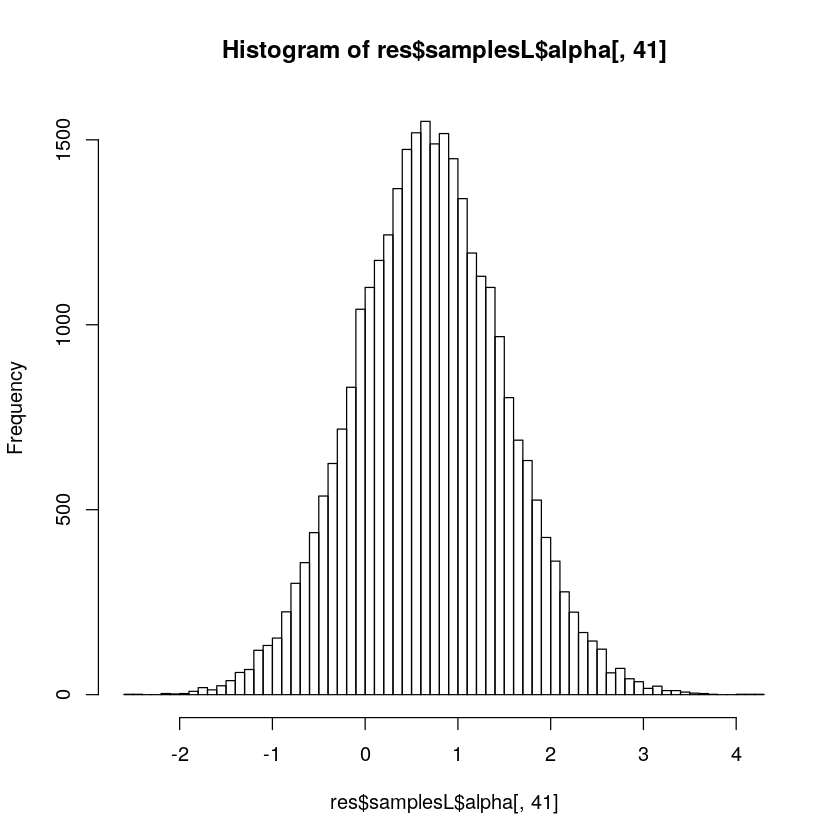

In [47]:
hist(res$samplesL$alpha[,41], breaks = 80)

In [79]:
# mean(res$samplesL$alpha[,42])

In [78]:
summary(res)

MCMC for the logit model:

Call:
logitBvs(y = y, N = N, X = X, prior = list(slab = "Normal", aj0 = rep(mu0, 
    ncol(X) - 1), V = var, w = c(wa0 = 1, wb0 = 1), pi = c(pa0 = 1.412, 
    pb0 = 10)), mcmc = list(M = 24000, burnin = 6000, msave = TRUE), 
    BVS = FALSE)


MCMC:
M = 24000 draws after a burn-in of 6000
Thinning parameter: 1

Prior: Normal prior [V=0.711745609189383]

 a0[0]  a0[1]  a0[2]  a0[3]  a0[4]  a0[5]  a0[6]  a0[7]  a0[8]  a0[9] a0[10] 
 0.000  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777 
a0[11] a0[12] a0[13] a0[14] a0[15] a0[16] a0[17] a0[18] a0[19] a0[20] a0[21] 
 0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777 
a0[22] a0[23] a0[24] a0[25] a0[26] a0[27] a0[28] a0[29] a0[30] a0[31] a0[32] 
 0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777 
a0[33] a0[34] a0[35] a0[36] a0[37] a0[38] a0[39] a0[40] a0[41] a0[42] a0[43] 
 0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  0.777  

In [4]:
data(simul_binomial)

In [50]:
y <- simul_binomial$y
N <- simul_binomial$N
X <- as.matrix(simul_binomial[, -c(1,2)])

In [51]:
length(y); length(N); dim(X)

[1] 512

[1] 512

[1] 512  10

In [16]:
head(X)

X.0,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,1


In [23]:
sum(X[,1])

[1] 512

In [17]:
m1 <- logitBvs(y = y, N = N, X = X)


MCMC for the binomial logit model with variable selection:

it = 1 /--- duration of MCMC so far: 1.02 sec.,  expected time to end: Inf  min. 
it = 2 /--- duration of MCMC so far: 1.03 sec.,  expected time to end: 171.65  min. 
it = 3 /--- duration of MCMC so far: 1.03 sec.,  expected time to end: 86.23  min. 
it = 4 /--- duration of MCMC so far: 1.04 sec.,  expected time to end: 57.7  min. 
it = 5 /--- duration of MCMC so far: 1.04 sec.,  expected time to end: 43.48  min. 
it = 10 /--- duration of MCMC so far: 1.06 sec.,  expected time to end: 19.57  min. 
it = 20 /--- duration of MCMC so far: 1.09 sec.,  expected time to end: 9.54  min. 
it = 50 /--- duration of MCMC so far: 1.16 sec.,  expected time to end: 3.92  min. 
it = 100 /--- duration of MCMC so far: 1.27 sec.,  expected time to end: 2.12  min. 
it = 200 /--- duration of MCMC so far: 1.57 sec.,  expected time to end: 1.29  min. 
it = 500 /--- duration of MCMC so far: 2.32 sec.,  expected time to end: 0.74  min. 
it = 1000 /--

In [18]:
print(m1)

Bayesian variable selection for the binomial logit model:

Call:
logitBvs(y = y, N = N, X = X)

Model: 512 observations
 Covariates: 9
 --- subject to selection: 9
 Random intercept included: no

MCMC:
M = 8000 draws after a burn-in of 2000
BVS started after 1000 iterations
Thinning parameter: 1

Runtime:
total: 101.8 sec.
since burn-in: 85 sec.

In [19]:
summary(m1)

Bayesian variable selection for the binomial logit model:

Call:
logitBvs(y = y, N = N, X = X)


MCMC:
M = 8000 draws after a burn-in of 2000
BVS started after 1000 iterations
Thinning parameter: 1

Prior:  spike-and-slab prior with Student-t slab [V=5]

a0[0] a0[1] a0[2] a0[3] a0[4] a0[5] a0[6] a0[7] a0[8] a0[9] 
    0     0     0     0     0     0     0     0     0     0 
 w[a]  w[b] pi[a] pi[b] 
    1     1     1     1 


Model averaged posterior means, estimated posterior inclusion
 probabilities and 95%-HPD intervals:

            Estimate P(.=1) 95%-HPD[l] 95%-HPD[u]
(Intercept)   -0.452     NA     -0.549     -0.366
alpha.1        0.180  1.000      0.124      0.236
alpha.2       -0.141  1.000     -0.197     -0.086
alpha.3        0.044  0.569      0.000      0.117
alpha.4       -1.077  1.000     -1.135     -1.018
alpha.5       -0.003  0.083     -0.037      0.000
alpha.6        0.000  0.045      0.000      0.000
alpha.7        1.152  1.000      1.096      1.213
alpha.8       -0.077